In [5]:
import pandas as pd
from adtk.detector import SeasonalAD
from adtk.visualization import plot

In [2]:
trs_df = (pd.read_csv('txs.csv', index_col="2021-01-01 00:00:00", parse_dates=True)
            .rename(columns={' 28': 'client_id'}))

In [3]:
def get_client_grouped_transactions(trs_df, client_id):
    """Получить транзакции клиента сгрупированные по дню.

    Args:
        trs_df: датафрэйм с транзакциями.
        client_id: идентификатор клиента.

    Returns:
        Серия со сгрупированными транзакциями клиента.
    """
    client_transactions = trs_df[trs_df.client_id == client_id]
    client_transactions = client_transactions.groupby([client_transactions.index.date]).count()
    client_transactions = client_transactions.squeeze()
    client_transactions.index = pd.to_datetime(client_transactions.index)
    return client_transactions


Найдены аномалии в данных для клиента с идентификатором 7:
DatetimeIndex(['2021-03-10'], dtype='datetime64[ns]', freq=None)
Найдены аномалии в данных для клиента с идентификатором 16:
DatetimeIndex(['2021-03-10'], dtype='datetime64[ns]', freq=None)
Найдены аномалии в данных для клиента с идентификатором 27:
DatetimeIndex(['2021-03-10'], dtype='datetime64[ns]', freq=None)


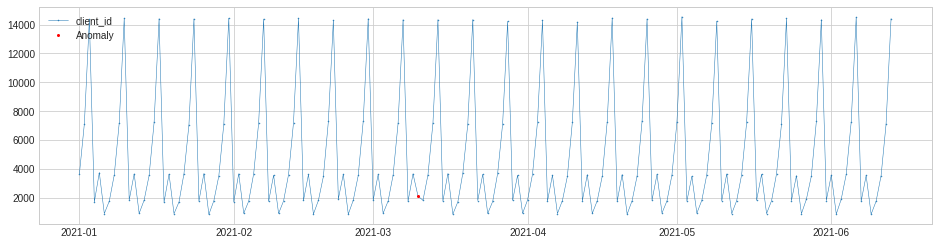

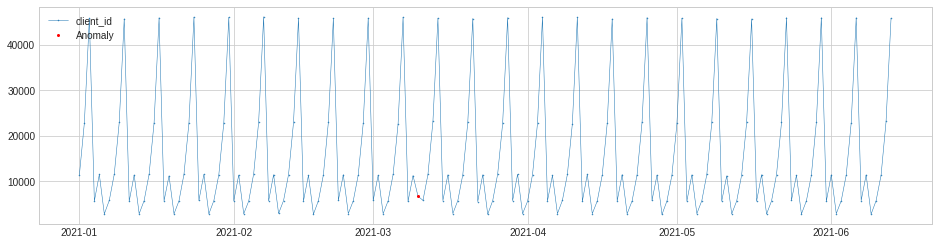

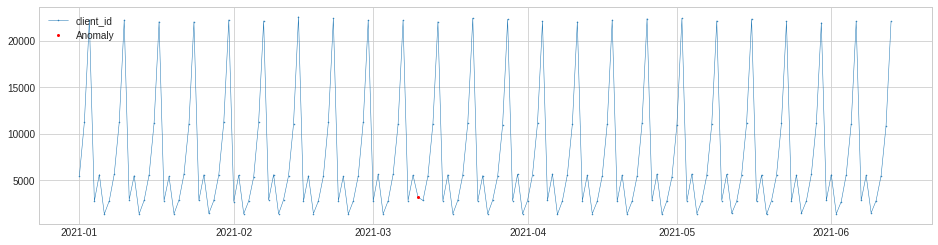

In [4]:
# Итерируем по каждому из 29 клиентов и проверяем наличие аномалий.
for client_id in range(30):
    client_transactions = get_client_grouped_transactions(trs_df=trs_df, client_id=client_id)
    seasonal_ad = SeasonalAD(c=5.0, side="both")
    anomalies = seasonal_ad.fit_detect(client_transactions)
    
    # Если аномалии найдены выводим сообщение и строим график
    if anomalies[anomalies].size > 0:
        print(f'Найдены аномалии в данных для клиента с идентификатором {client_id}:\n{anomalies[anomalies].index}')
        plot(client_transactions,
             anomaly=anomalies,
             ts_markersize=1,
             anomaly_color='red',
             anomaly_tag="marker",
             anomaly_markersize=2)
